In [43]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
from scipy import stats
from scipy.stats import skew 
import researchpy as rp
# Import plotly
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

## Data Inspection

In [2]:
#importing the csv dataset
train = pd.read_csv('train.csv')
display(train)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [16]:
#Inspecting the general characteristics of the dataset
print ("The number of features (d) is ",len(train. columns))
d = len(train.columns)
print ("The number of data (n) is", len(train))
n = len(train)

The number of features (d) is  81
The number of data (n) is 1460


In [41]:
#features names and dtype
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

The dtype "object" are the categorical features, but we have to take note that some variables such as "MSSubClass" are actually categorical even though it's dtype is int64.

In [19]:
#Understand the descriptions of the different features
f = open("data_description.txt", "r")
print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In this dataset, some features are categorical and some are continuous variables. Some variables are also time-sensitive so we can do a time-analysis based on that.

In [63]:
#Inspect the completeness of data (empty data)
def checkemptydata(dataset):
    emptylist= []
    emptylist1 = []
    for i in dataset.columns: 
        emptylist.append(dataset[dataset[i] == ''].index) 
    for x in emptylist:
        emptylist1.append(len(x))
    if any(emptylist1) == False: 
        print ("The dataset has no empty data")
    else: 
        print ("The dataset contains empty data")      

In [64]:
#check for empty data
checkemptydata(train)

The dataset has no empty data


In [106]:
#Inspect the completeness of data (null data)
def checknulldata(dataset):
    nalist = []
    index = []
    counter = 0
    for i in dataset.columns: 
        nalist.append(train[train[i].isnull()].index.tolist())
    while counter < len(nalist):
        if len(nalist[counter]) != 0: 
            index.append(counter)
        counter+=1
    if len(index) != 0: 
        for x in index:
            print(dataset.columns[x],"/number of null data:", len(nalist[x])) #return the features which have null data
    else: 
        print("The dataset has no null data")

In [107]:
#features which have null data
checknulldata(train)

LotFrontage /number of null data: 259
Alley /number of null data: 1369
MasVnrType /number of null data: 8
MasVnrArea /number of null data: 8
BsmtQual /number of null data: 37
BsmtCond /number of null data: 37
BsmtExposure /number of null data: 38
BsmtFinType1 /number of null data: 37
BsmtFinType2 /number of null data: 38
Electrical /number of null data: 1
FireplaceQu /number of null data: 690
GarageType /number of null data: 81
GarageYrBlt /number of null data: 81
GarageFinish /number of null data: 81
GarageQual /number of null data: 81
GarageCond /number of null data: 81
PoolQC /number of null data: 1453
Fence /number of null data: 1179
MiscFeature /number of null data: 1406


These missing data may affect the accuracy of our regression model so in the next step, we may perform data imputation or other data cleaning methods to improve the accuracy our regression model.

However, upon closer analysis, we realise that the NA values in some features have a specific purpose and do not represent missing data. E.g. NA may represent no basement in BsmtQual.

The features which use NA to present a specific purpose are: Alley, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond, PoolQC, Fence, MiscFeature

**As such, we can conclude that the features which contain real null data are:**
1. LotFrontage /number of null data: 259
2. MasVnrType /number of null data: 8
3. MasVnrArea /number of null data: 8
4. Electrical /number of null data: 1
5. GarageYrBlt /number of null data: 81

## Data Exploration - Uni-Variate Analysis: Categorical Variables

From the feature descriptions, we can conclude that the categorical variables are: MSSubClass, MSZoning, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, ExterQual, ExterCond,Foundation,  BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, Heating, HeatingQC, CentralAir, Electrical, KitchenQual, Functional, FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond, PavedDrive, PoolQC, Fence, MiscFeature, SaleType, SaleCondition

In [15]:
categorical = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond','Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

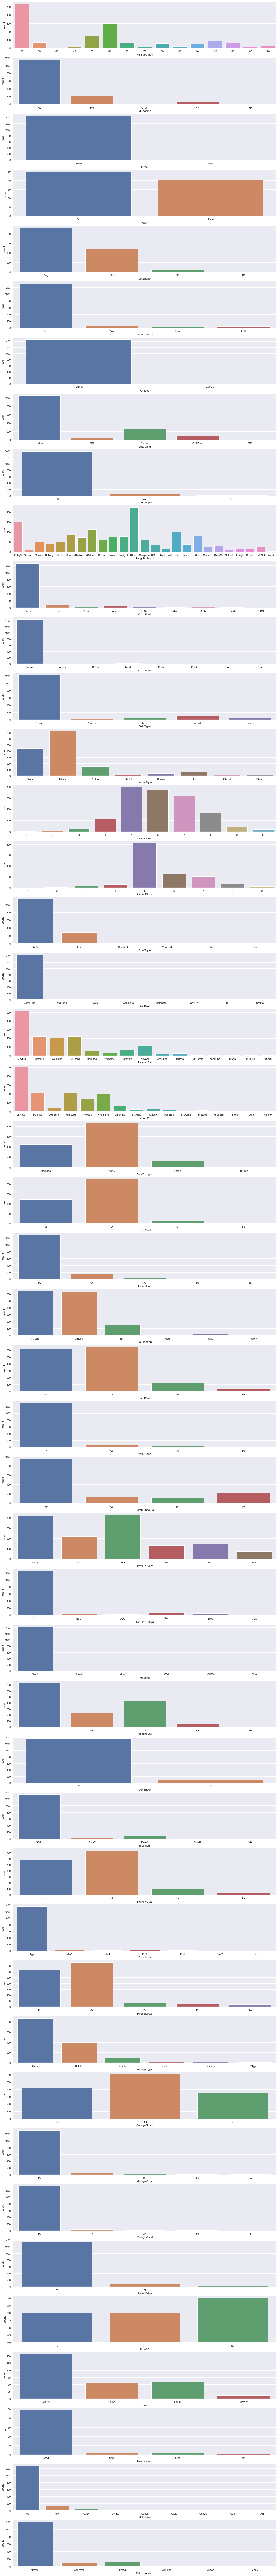

In [125]:
#Count Plot
f, axes = plt.subplots(46, 1, figsize=(20, 200))

count = 0
for i in categorical:
    sb.countplot(x=i, data=train, ax = axes[count])
    count += 1

In [22]:
#skewness of categorical variables
max_percent = []
for i in categorical: 
    if rp.summary_cat(train[i])["Percent"].max() >= 90: 
        max_percent.append(rp.summary_cat(train[i])["Percent"].max())
print ("The number of variables with one category of data which occupies >= 90% of data =", len(max_percent))

The number of variables with one category of data which occupies >= 90% of data = 14


In [28]:
#highly skewed categorical variables
for i in categorical: 
    if rp.summary_cat(train[i])["Percent"].max() >= 90: 
         print (i,"/ratio of the dominant category = ", rp.summary_cat(train[i])["Percent"].max()/100)

Street /ratio of the dominant category =  0.9959
Utilities /ratio of the dominant category =  0.9993000000000001
LandSlope /ratio of the dominant category =  0.9466
Condition2 /ratio of the dominant category =  0.9897
RoofMatl /ratio of the dominant category =  0.9822
BsmtCond /ratio of the dominant category =  0.9213
Heating /ratio of the dominant category =  0.9781
CentralAir /ratio of the dominant category =  0.9349
Electrical /ratio of the dominant category =  0.9143000000000001
Functional /ratio of the dominant category =  0.9315000000000001
GarageQual /ratio of the dominant category =  0.9506999999999999
GarageCond /ratio of the dominant category =  0.9616
PavedDrive /ratio of the dominant category =  0.9178000000000001
MiscFeature /ratio of the dominant category =  0.9074


**Outliers adversely affect the regression-based model's accuracy and performance. 
Hence, we may need to remove the outliers for the extremely skewed data to boost the model's performance.**

## Data Exploration - Uni-Variate Analysis: Continuous Variables

In [49]:
continuous = ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr','TotRmsAbvGrd', 'Fireplaces', 
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']

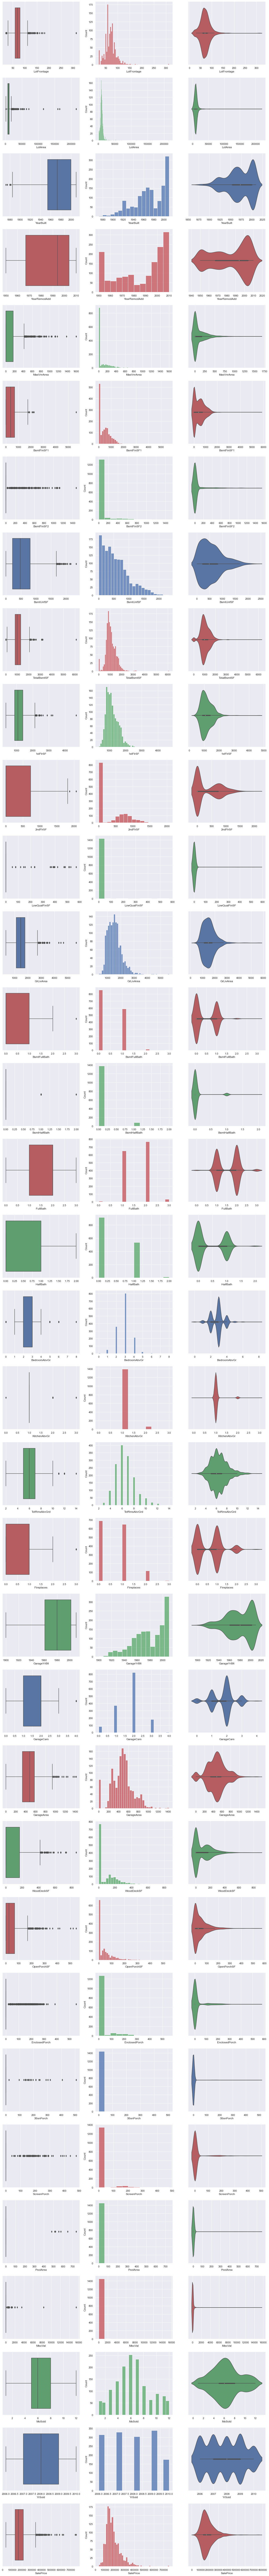

In [17]:
#investigating the skewness of data features (visually)
f, axes = plt.subplots(len(continuous), 3, figsize=(20, 200))
colors = ["r", "g", "b","r","g"]
colors = colors*7

count = 0
for i in continuous:
    sb.boxplot(x = train[i], color = colors[count], ax = axes[count,0])
    sb.histplot(x = train[i], color = colors[count], ax = axes[count,1])
    sb.violinplot(x = train[i], color = colors[count], ax = axes[count,2])
    count += 1

In [91]:
#interactive graphic display of boxplots of continuous data (smaller range)
continuous = ['LotFrontage', 'YearBuilt', 'YearRemodAdd', 
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr','TotRmsAbvGrd', 'Fireplaces', 
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MoSold', 'YrSold']
N = len(continuous)

# generate an array of rainbow colors by fixing the saturation and lightness of the HSL
# representation of colour and marching around the hue.
c = ['hsl('+str(h)+',50%'+',50%)' for h in np.linspace(0, 360, N)]

# Each box is represented by a dict that contains the data, the type, and the colour.
# Use list comprehension to describe N boxes, each with a different colour and with different randomly generated data:
fig = go.Figure(data=[go.Box(
    y=train[continuous[i]],
    marker_color=c[i],name=continuous[i],boxpoints=False
    ) for i in range(int(N))])

fig.update_yaxes(matches=None)

# format the layout
fig.update_layout(
    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    yaxis=dict(zeroline=False, gridcolor='white'),
    paper_bgcolor='rgb(233,233,233)',
    plot_bgcolor='rgb(233,233,233)',
)

fig.show()

#variables which have a smaller range can be enlarged with the zoom function to see more clearly

In [92]:
#interactive graphic display of boxplots of continuous data (wider range)
continuous = ['LotArea', 'MiscVal', 'SalePrice']
N = len(continuous)

# generate an array of rainbow colors by fixing the saturation and lightness of the HSL
# representation of colour and marching around the hue.
c = ['hsl('+str(h)+',50%'+',50%)' for h in np.linspace(0, 360, N)]

# Each box is represented by a dict that contains the data, the type, and the colour.
# Use list comprehension to describe N boxes, each with a different colour and with different randomly generated data:
fig = go.Figure(data=[go.Box(
    y=train[continuous[i]],
    marker_color=c[i],name=continuous[i],boxpoints=False
    ) for i in range(int(N))])

fig.update_yaxes(matches=None)

# format the layout
fig.update_layout(
    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    yaxis=dict(zeroline=False, gridcolor='white'),
    paper_bgcolor='rgb(233,233,233)',
    plot_bgcolor='rgb(233,233,233)',
)

fig.show()

In [172]:
#Statistical Summary 
continuous_variables=train[continuous]
continuous_variables.describe()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1201.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,24.284752,9981.264932,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,21.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,59.000000,7553.500000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,69.000000,9478.500000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,80.000000,11601.500000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,313.000000,215245.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
#calculating skewness of continuous variables
continuous2 = train[continuous].dropna() #drop the na rows from all the continuous variables so that we can calculate the skewness of data
array = skew(continuous2)
array

array([ 2.24818324, 15.58722012, -0.6175224 , -0.56499932,  2.70332112,
        1.93148812,  4.39346932,  0.87460143,  1.7525671 ,  1.36195734,
        0.80632998, 10.00740967,  1.54788621,  0.56804292,  4.1023754 ,
        0.01580061,  0.63732342,  0.07432775,  4.81608628,  0.72214894,
        0.64283602, -0.64087894,  0.205741  ,  0.73291148,  1.54771879,
        2.4007097 ,  3.16900267, 10.84033752,  4.01373103, 13.76537259,
        9.68700461,  0.17280772,  0.1065867 ,  1.9310267 ])

- skewness = 0 : normally distributed.
- skewness > 0 : more weight in the left tail of the distribution.
- skewness < 0 : more weight in the right tail of the distribution. 

In [16]:
#the top 3 features which are the most skewed
index = array.argsort()[-3:][::-1]
for i in index: 
    print (continuous[i],": skewness = ", array[i])

LotArea : skewness =  15.587220115567613
PoolArea : skewness =  13.765372588096474
3SsnPorch : skewness =  10.840337519203489


All these 3 features are more skewed with more weight in the left tail of the distribution; This shows that most housing properties in the data have a small lot area, pool area as well as the three season porch area with a small minority (outliers) with much bigger areas.

**Outliers adversely affect the regression-based model's accuracy and performance. 
Hence, we may need to remove the outliers for the extremely skewed data to boost the model's performance.**

## Data Exploration - Correlation between Continuous Variables

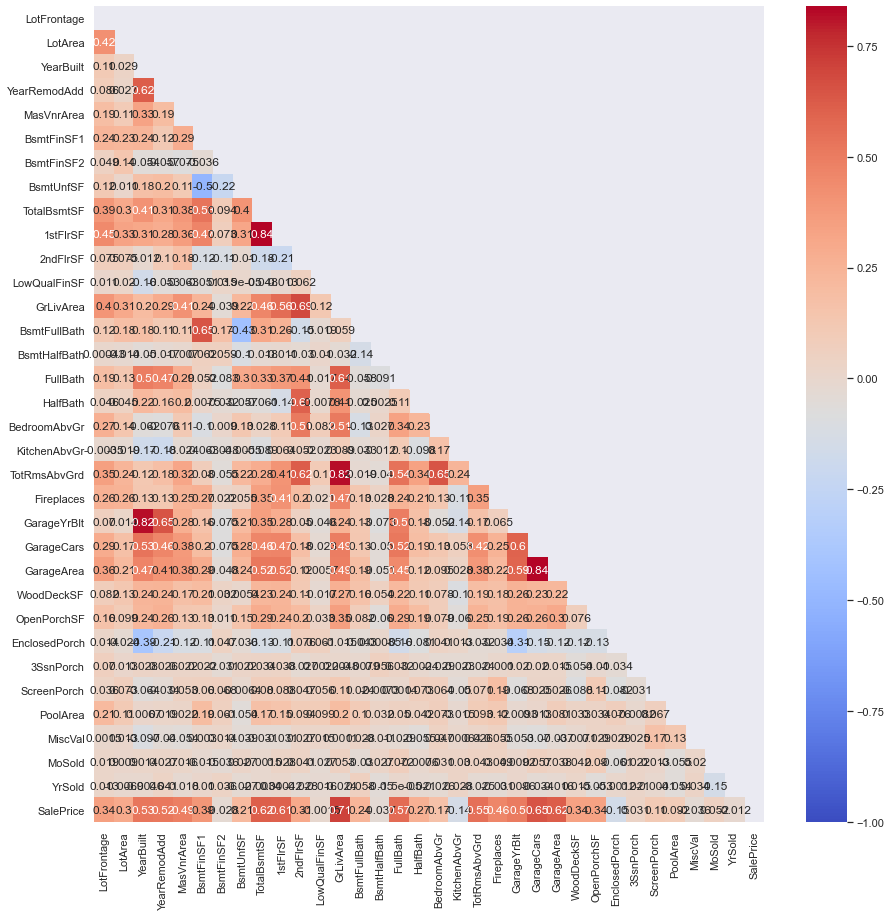

In [32]:
#overall plot of correlation between all continuous variables
x = continuous2.corr()
mask = np.zeros_like(x, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(15,15))
sb.heatmap(x,
            vmin=-1,
            cmap='coolwarm',
            annot=True,
            mask = mask);

Overall correlation: as seen from the heat map, most variables hold a generally more positive correlation with each other (as indicated by overall red hue). Next, we will look into the more specific data exploration between different classes of features.

In [33]:
corr_matrix = continuous2.corr().abs() #get the absolute values of all correlations
#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)
sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                  .stack()
                  .sort_values(ascending=False))
print(sol[:10])#top 10 highest correlation pairs

GarageCars    GarageArea      0.839415
TotalBsmtSF   1stFlrSF        0.835999
GrLivArea     TotRmsAbvGrd    0.824312
YearBuilt     GarageYrBlt     0.823520
GrLivArea     SalePrice       0.705154
2ndFlrSF      GrLivArea       0.688292
BsmtFinSF1    BsmtFullBath    0.651727
BedroomAbvGr  TotRmsAbvGrd    0.650285
GarageCars    SalePrice       0.647034
YearRemodAdd  GarageYrBlt     0.645808
dtype: float64


As our focus is to predict the housing prices (SalePrice), let's find out which features are most highly correlated with SalePrice.

In [50]:
#top 3 continuous variables most closely related to SalePrice
corr = continuous2.corr()['SalePrice']
corr.nlargest(4)[1:4]

GrLivArea     0.705154
GarageCars    0.647034
GarageArea    0.619330
Name: SalePrice, dtype: float64

From the correlation analysis, these 3 continuous features are the most closely related to SalePrice.

## Data Exploration - Correlation between SalePrice and Categorical Variables

As the categorical variables cannot be directly used to compute the correlation between SalePrice and themselves, they have to be first encoded with dummy variables first. We will perform **one-hot encoding**.

In [67]:
onehot_train = pd.get_dummies(train[categorical], columns= categorical, prefix= categorical)
onehot_train['SalePrice'] = train["SalePrice"]
print(onehot_train)

      MSSubClass_20  MSSubClass_30  MSSubClass_40  MSSubClass_45  \
0                 0              0              0              0   
1                 1              0              0              0   
2                 0              0              0              0   
3                 0              0              0              0   
4                 0              0              0              0   
...             ...            ...            ...            ...   
1455              0              0              0              0   
1456              1              0              0              0   
1457              0              0              0              0   
1458              1              0              0              0   
1459              1              0              0              0   

      MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  \
0                 0              1              0              0   
1                 0              0             

In [69]:
#top 3 categorical variables which have the highest correlation with SalePrice
corr = onehot_train.corr()['SalePrice']
corr.nlargest(4)[1:4]

BsmtQual_Ex         0.553105
KitchenQual_Ex      0.504094
Foundation_PConc    0.497734
Name: SalePrice, dtype: float64

This shows that the quality of the basement is most correlated with SalePrice, followed by quality of the kitchen and lastly the type of foudation (poured contrete is the best)